In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import warnings as w

In [103]:
w.filterwarnings('ignore')

In [104]:
sns.set_style('darkgrid')

In [105]:
data = pd.read_csv('projects.csv')
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   unfinished      2157 non-null   int64
 1   expected_hours  2157 non-null   int64
 2   price           2157 non-null   int64
dtypes: int64(3)
memory usage: 50.7 KB


In [107]:
swap = {
    0 : 1,
    1 : 0
}

data['finished'] = data['unfinished'].map(swap)

In [108]:
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


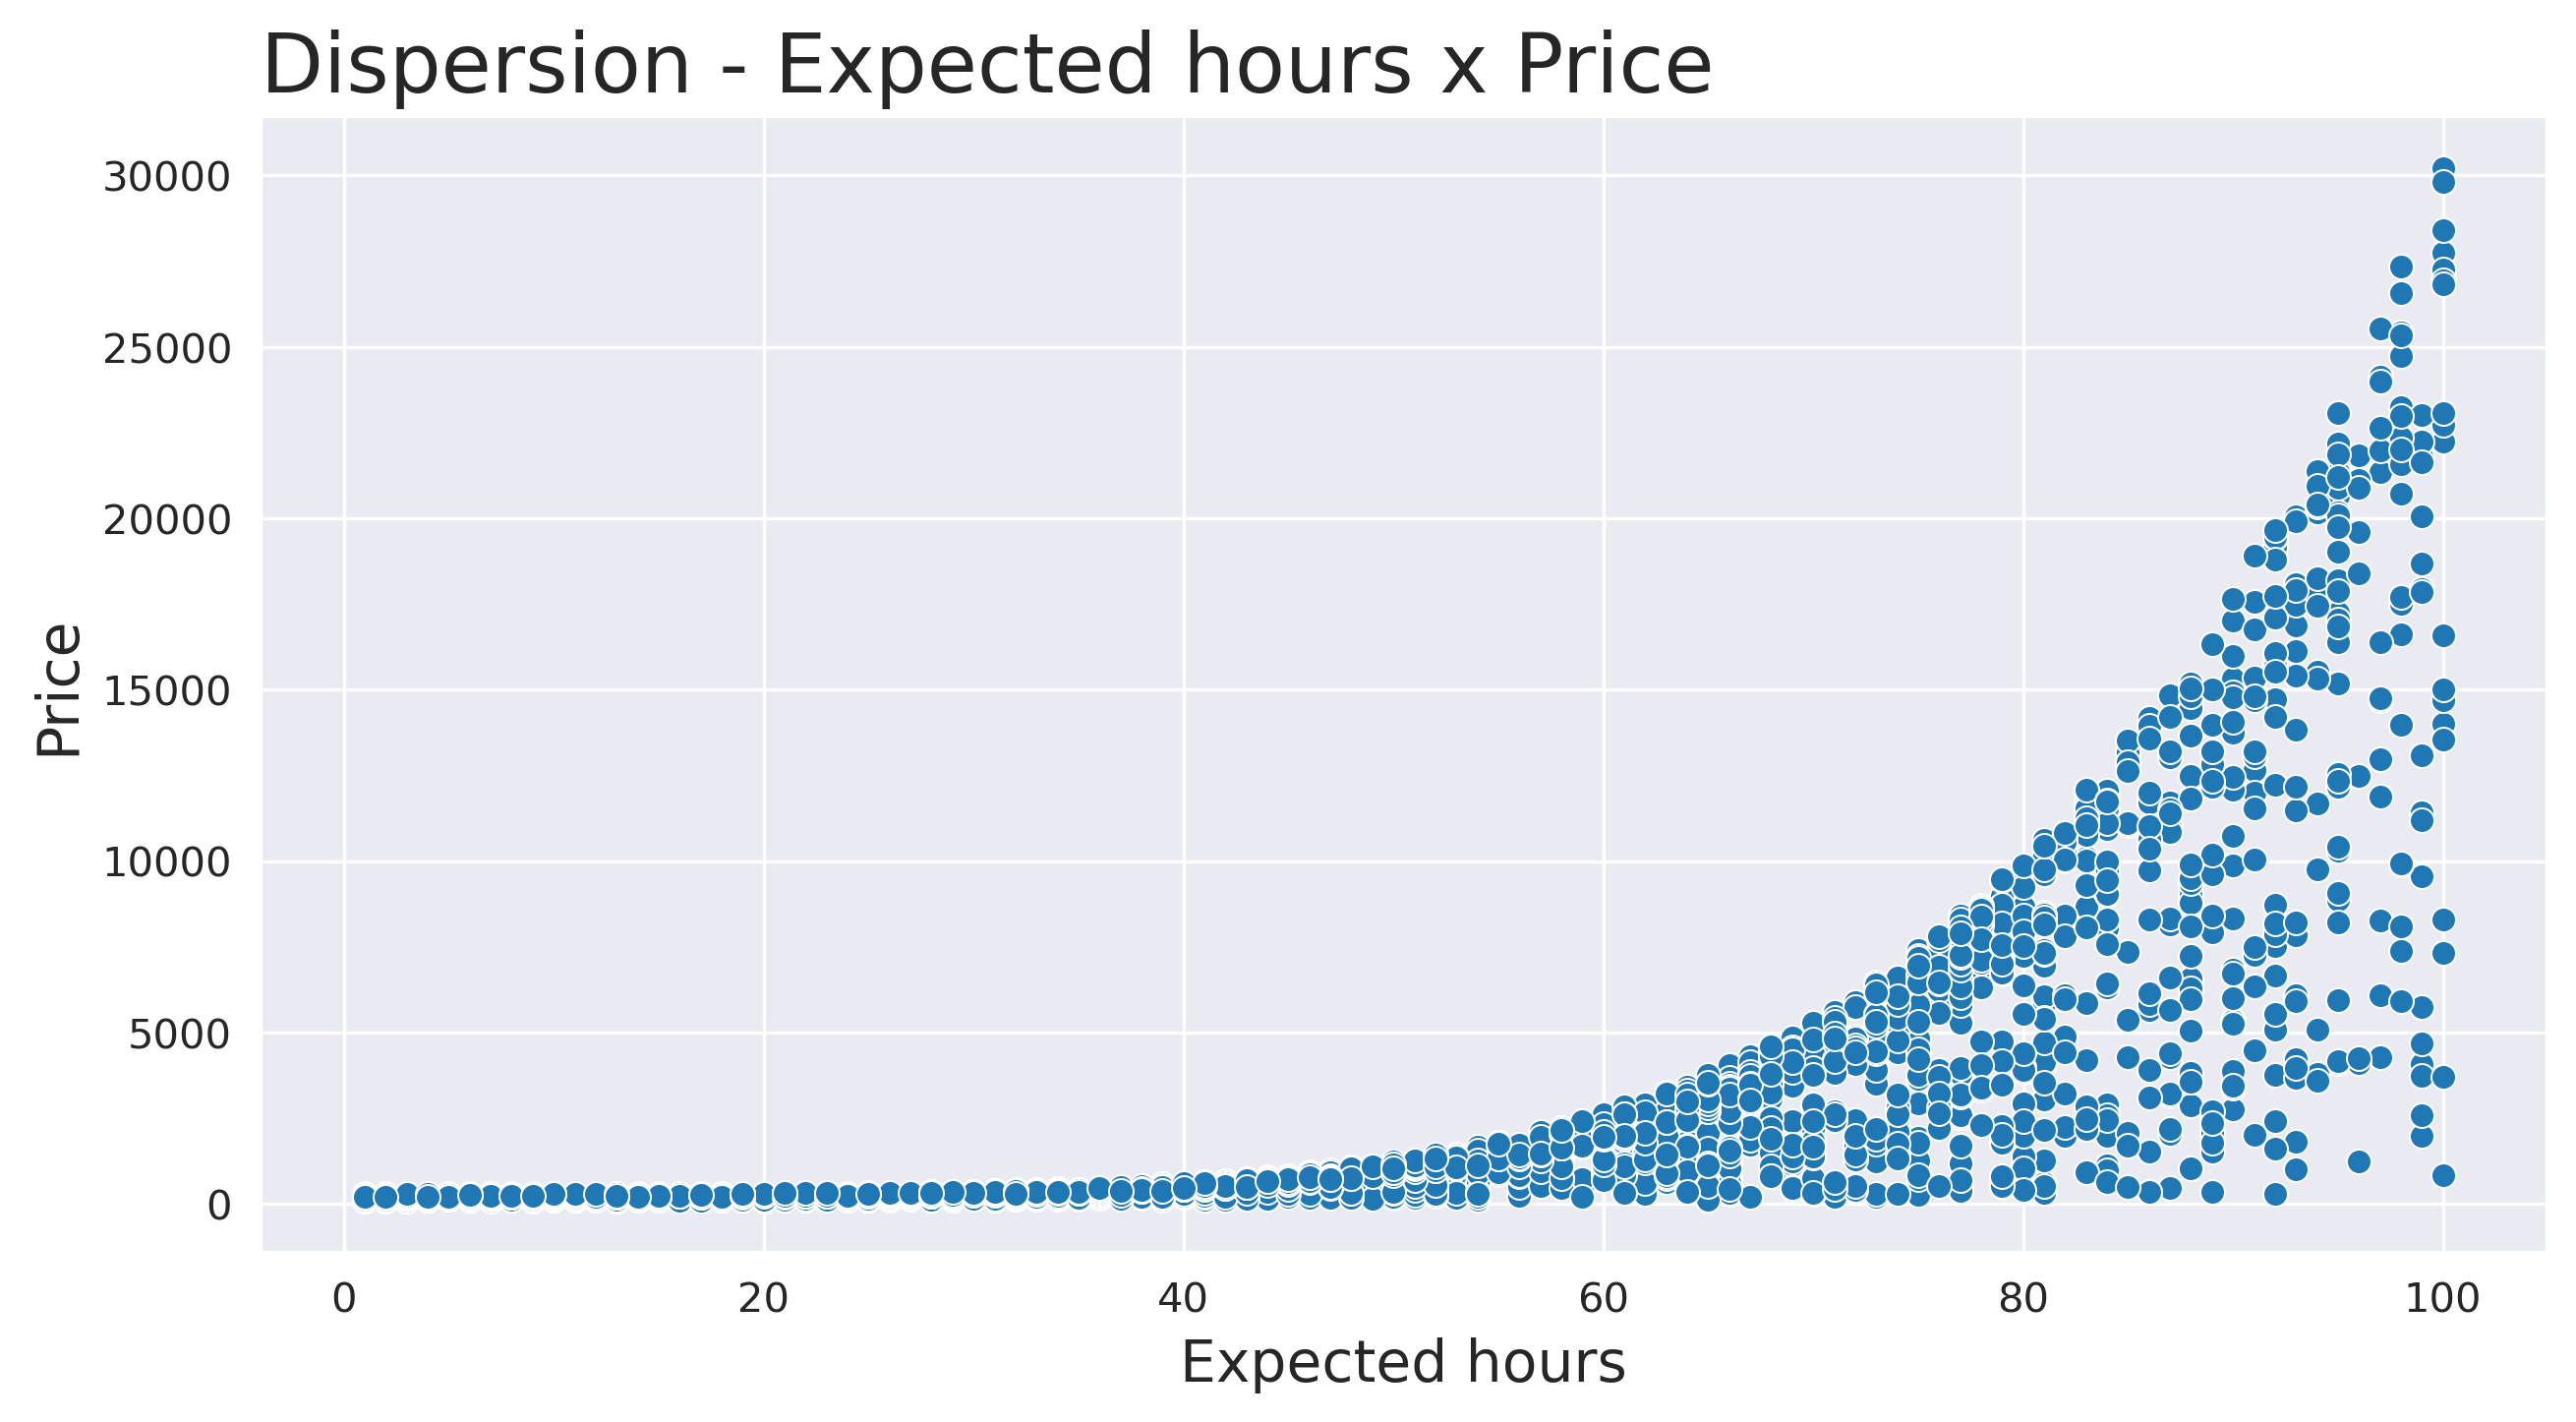

In [109]:
ax = sns.scatterplot(x='expected_hours', y='price', data=data)
ax.figure.set_size_inches(10, 5)
ax.figure.dpi = 300
ax.set_title('Dispersion - Expected hours x Price', fontsize=20, loc='left')
ax.set_xlabel('Expected hours', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
plt.show()

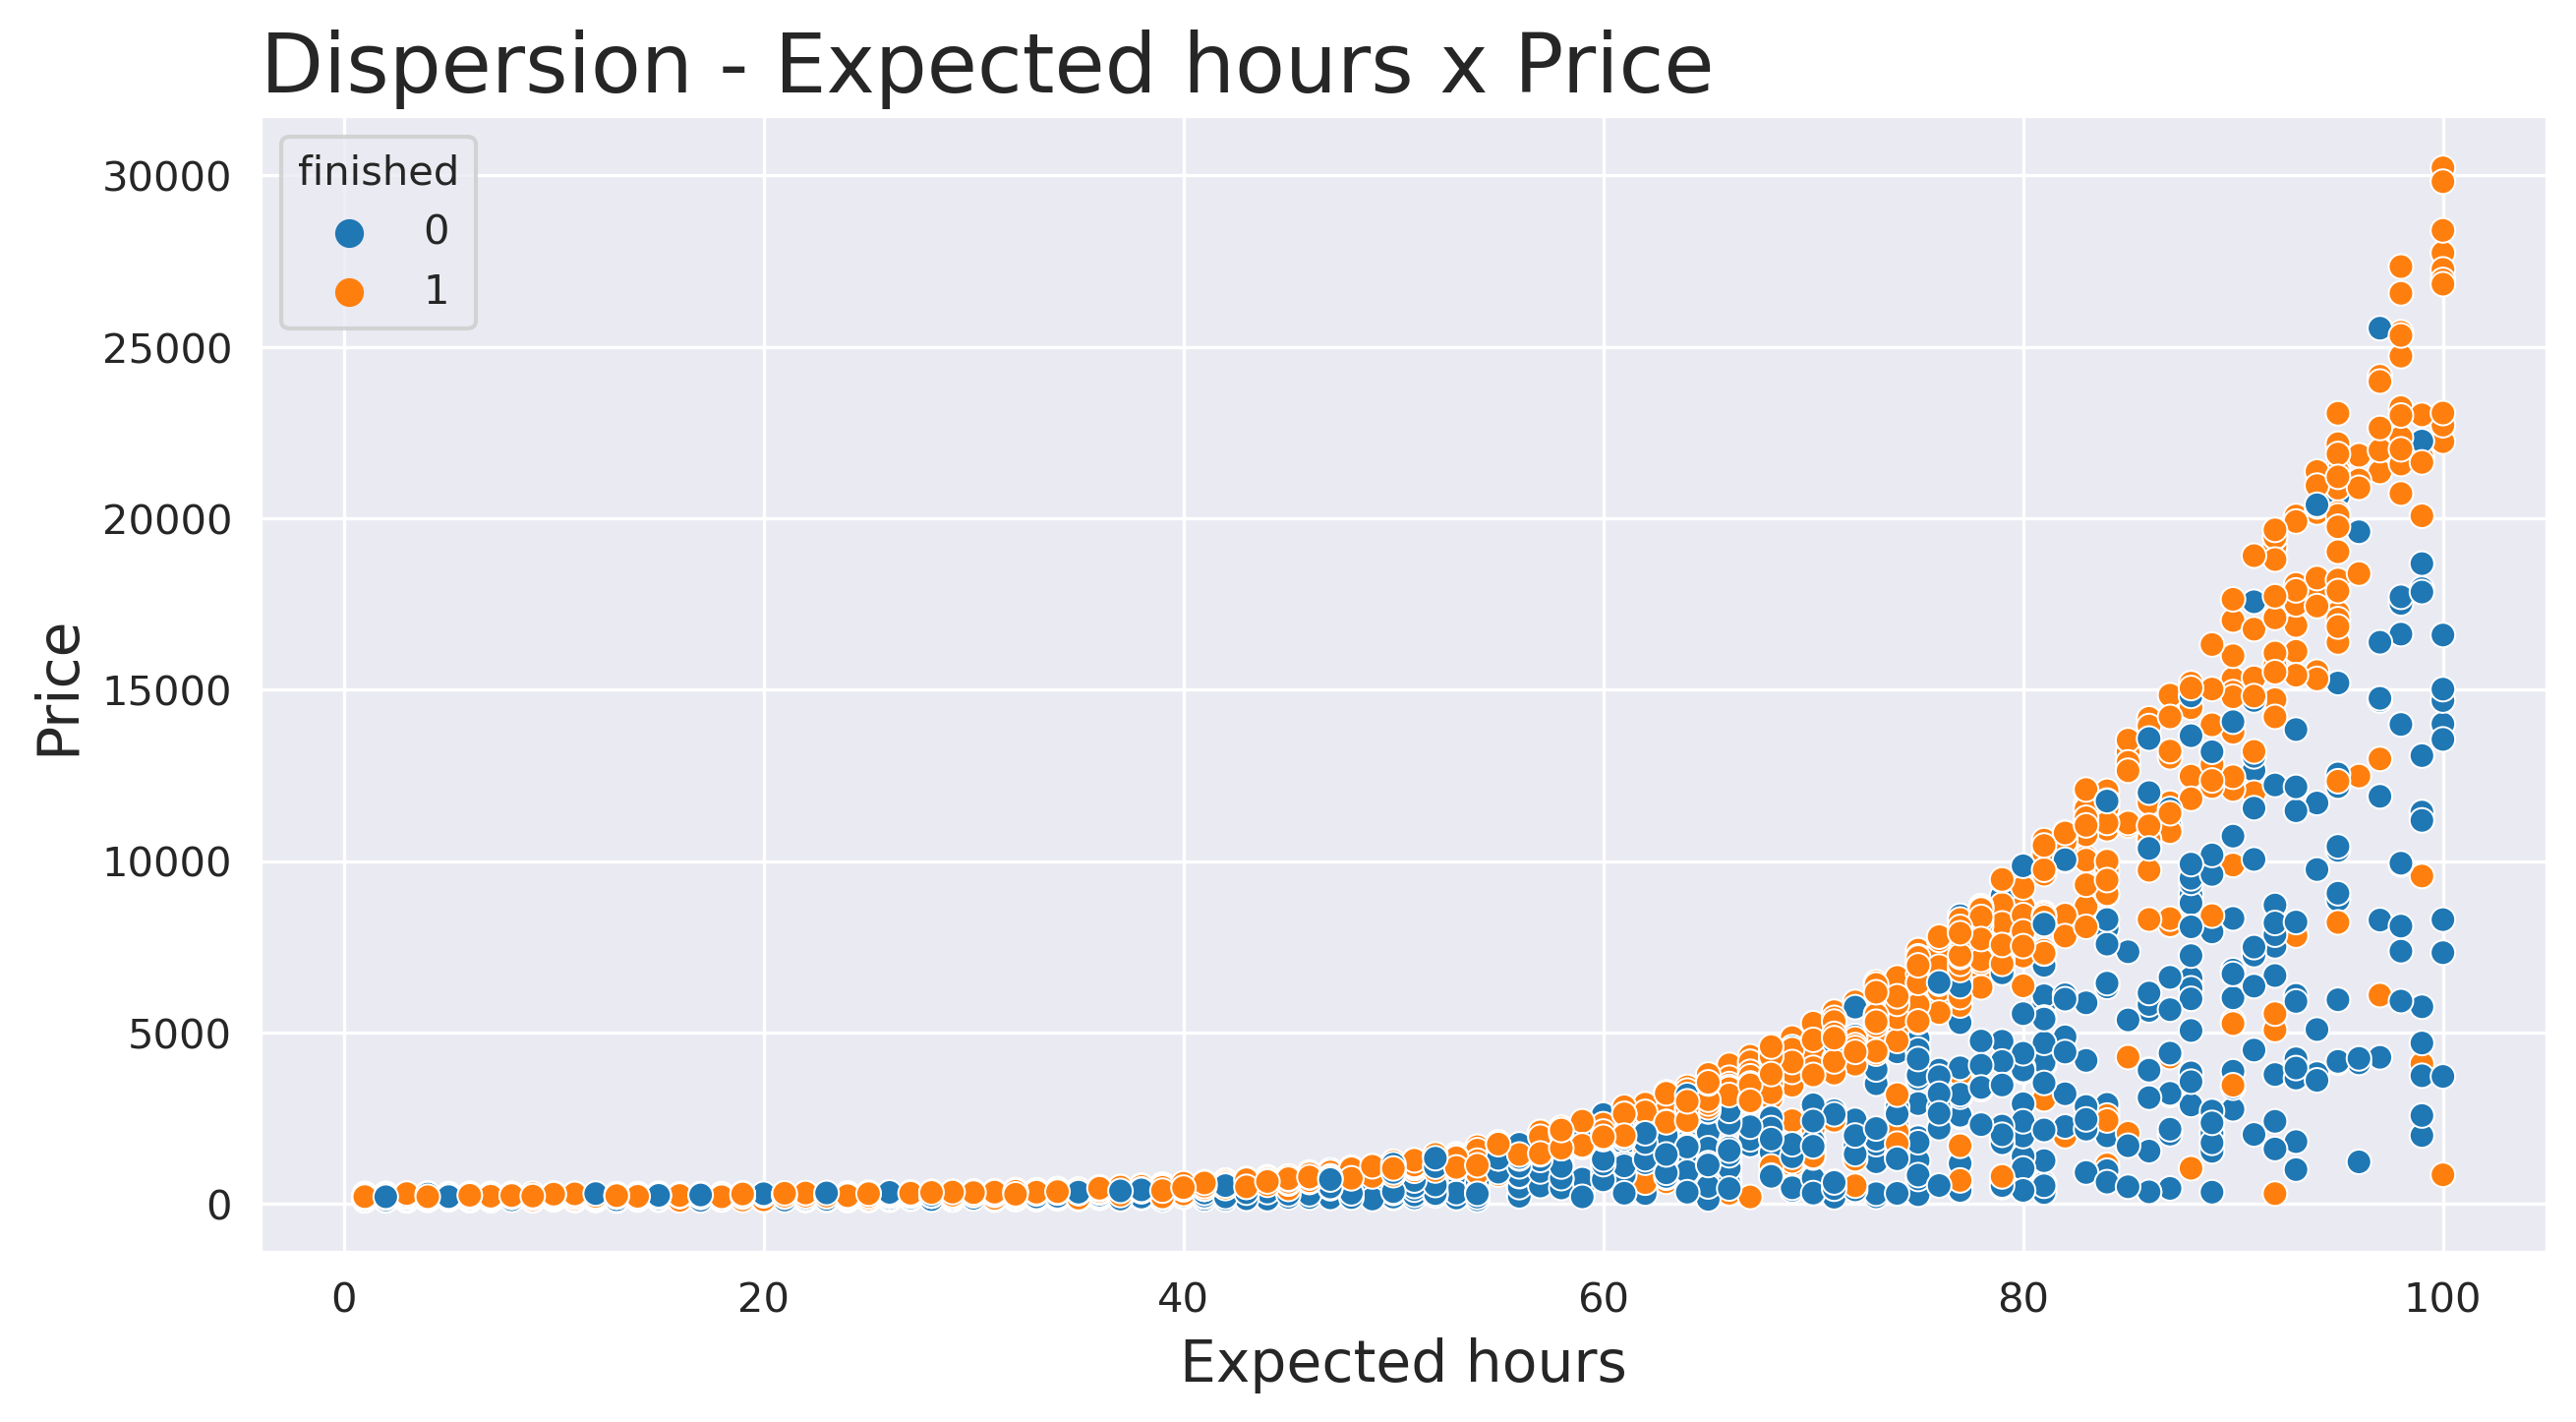

In [110]:
ax = sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)
ax.figure.set_size_inches(10, 5)
ax.figure.dpi = 300
ax.set_title('Dispersion - Expected hours x Price', fontsize=20, loc='left')
ax.set_xlabel('Expected hours', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
plt.show()

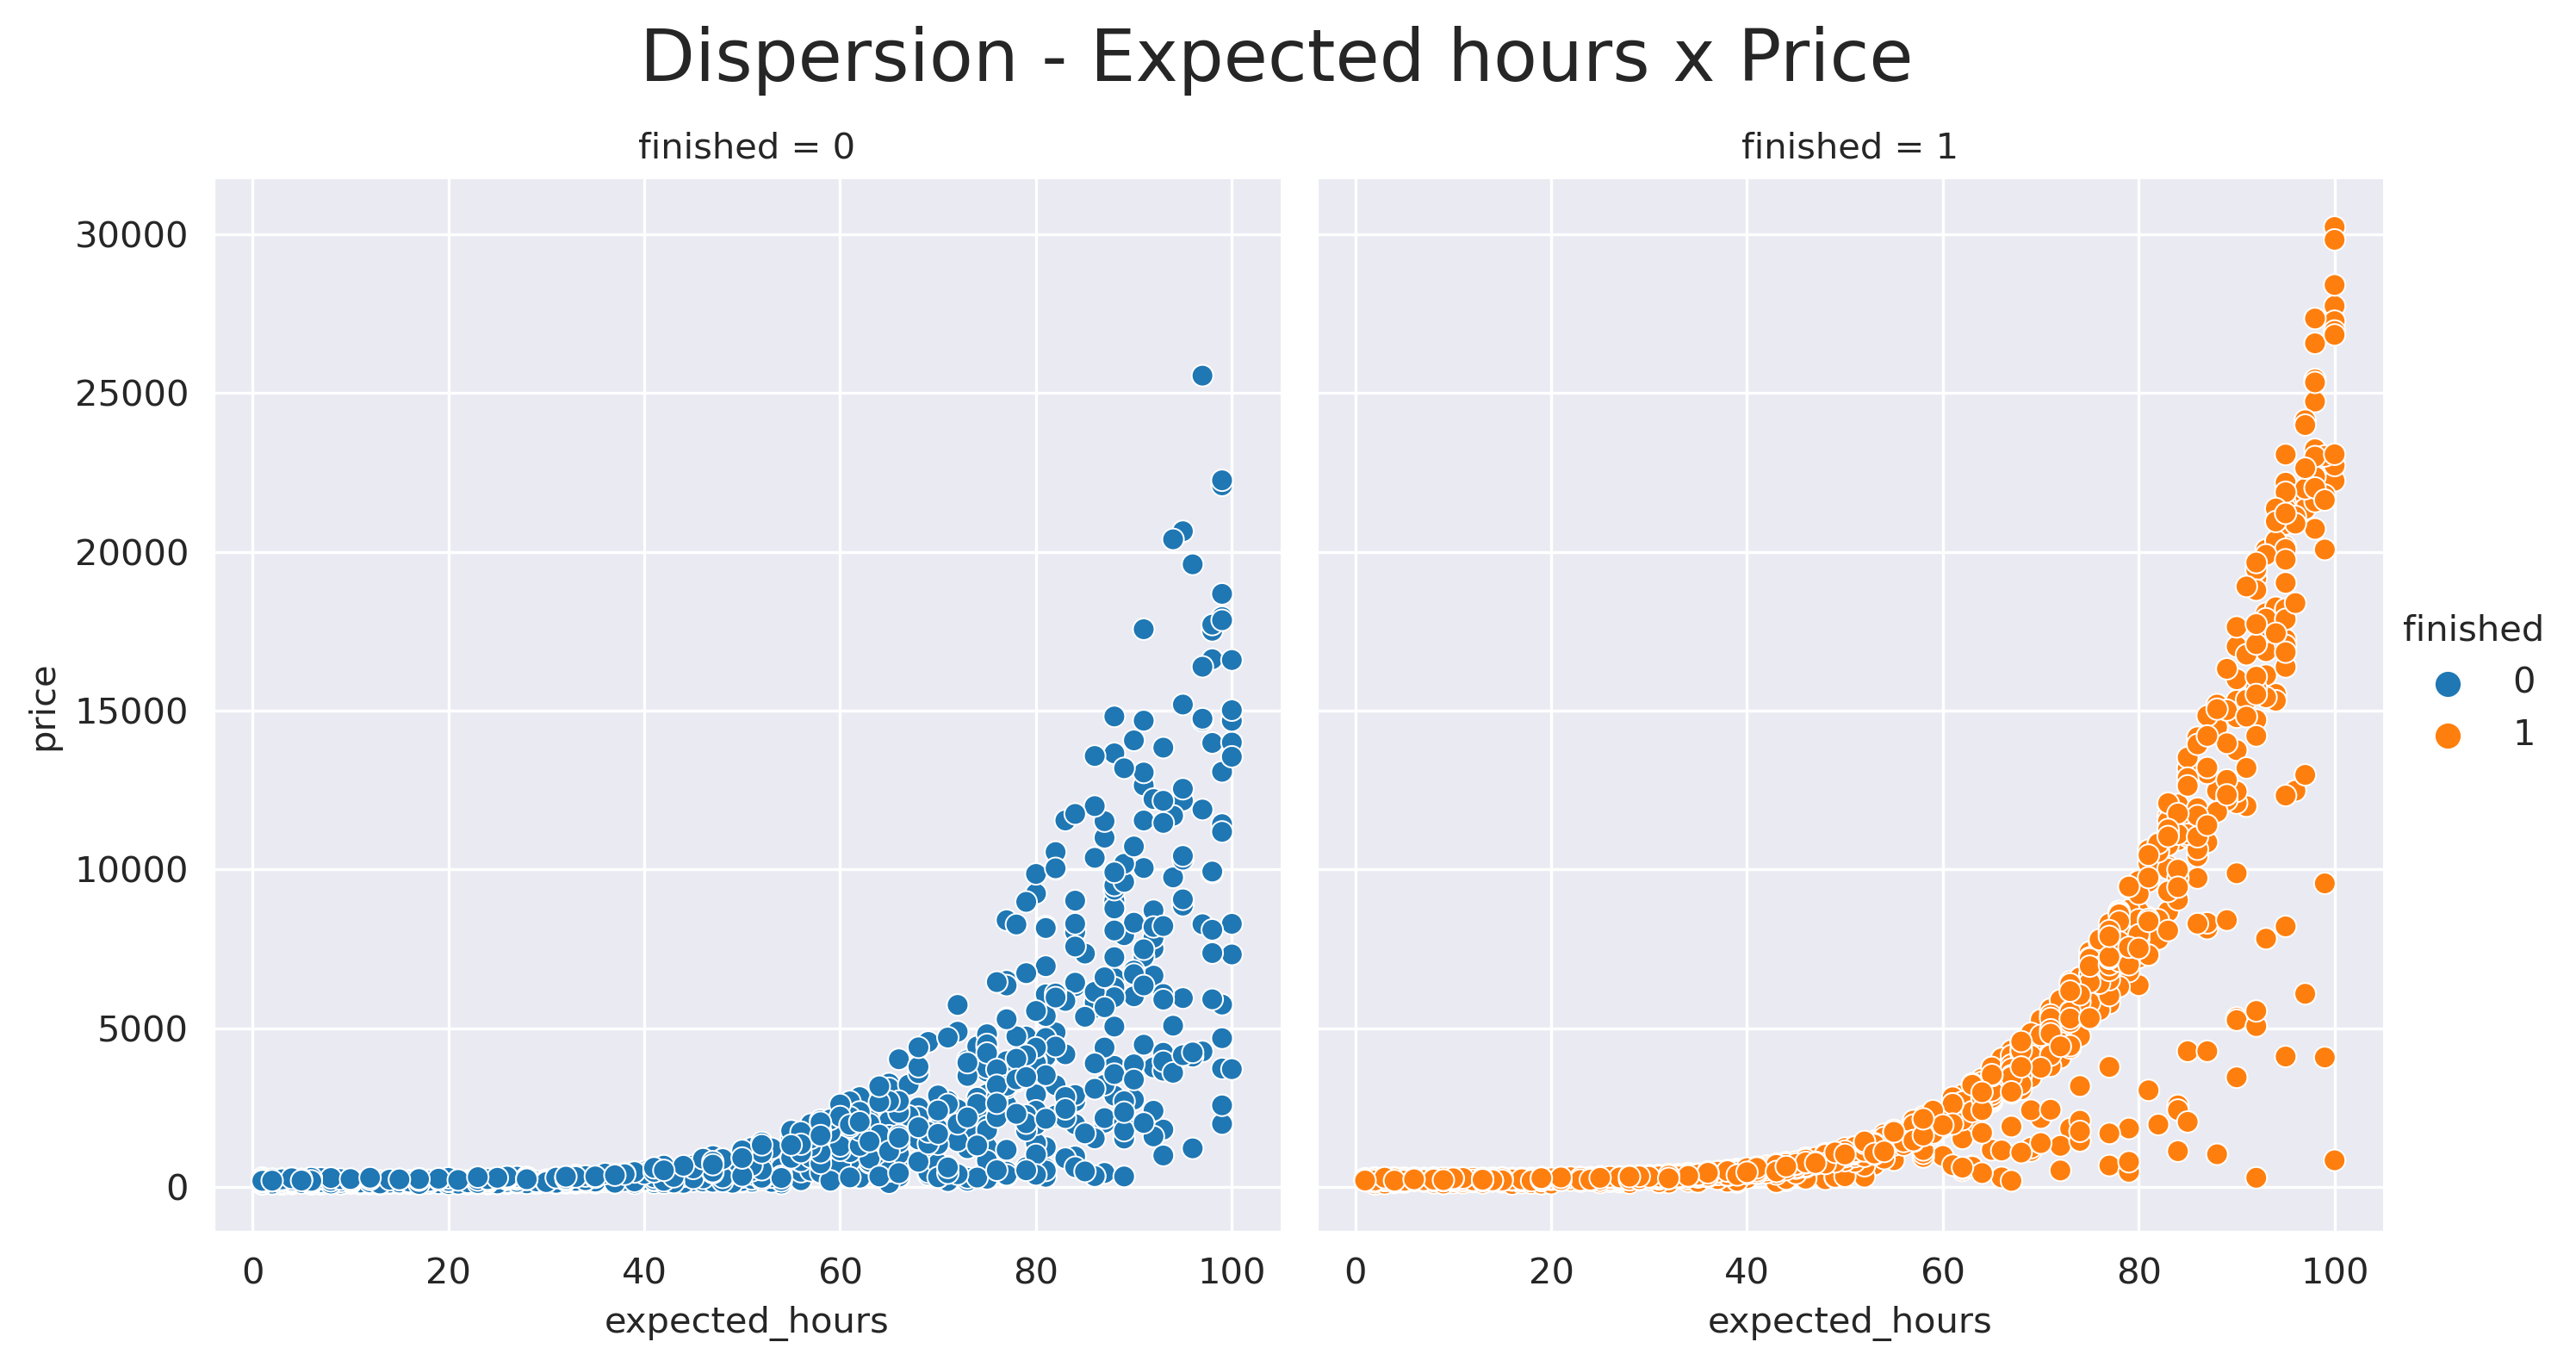

In [111]:
ax = sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data=data)
ax.figure.set_size_inches(10, 5)
ax.figure.dpi = 300
ax.fig.suptitle('Dispersion - Expected hours x Price', fontsize=20, y=1.05)
plt.show()

In [112]:
X = data[['expected_hours', 'price']]
y = data['finished']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=.25, 
    random_state=5, 
    stratify=y
)

print(f'We will train the model with {X_train.shape[0]} elements and will test with {X_test.shape[0]} elements')

model = LinearSVC(random_state=5)
model.fit(X_train, y_train)
y_expected = model.predict(X_test)

accuracy = accuracy_score(y_test, y_expected)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

We will train the model with 1617 elements and will test with 540 elements
Accuracy of the model: 54.07%


In [114]:
baseline_expected = np.ones(X_test.shape[0])
accuracy = accuracy_score(y_test, baseline_expected)
print(f'Accuracy of the baseline model: {accuracy * 100:.2f}%')

Accuracy of the baseline model: 52.59%


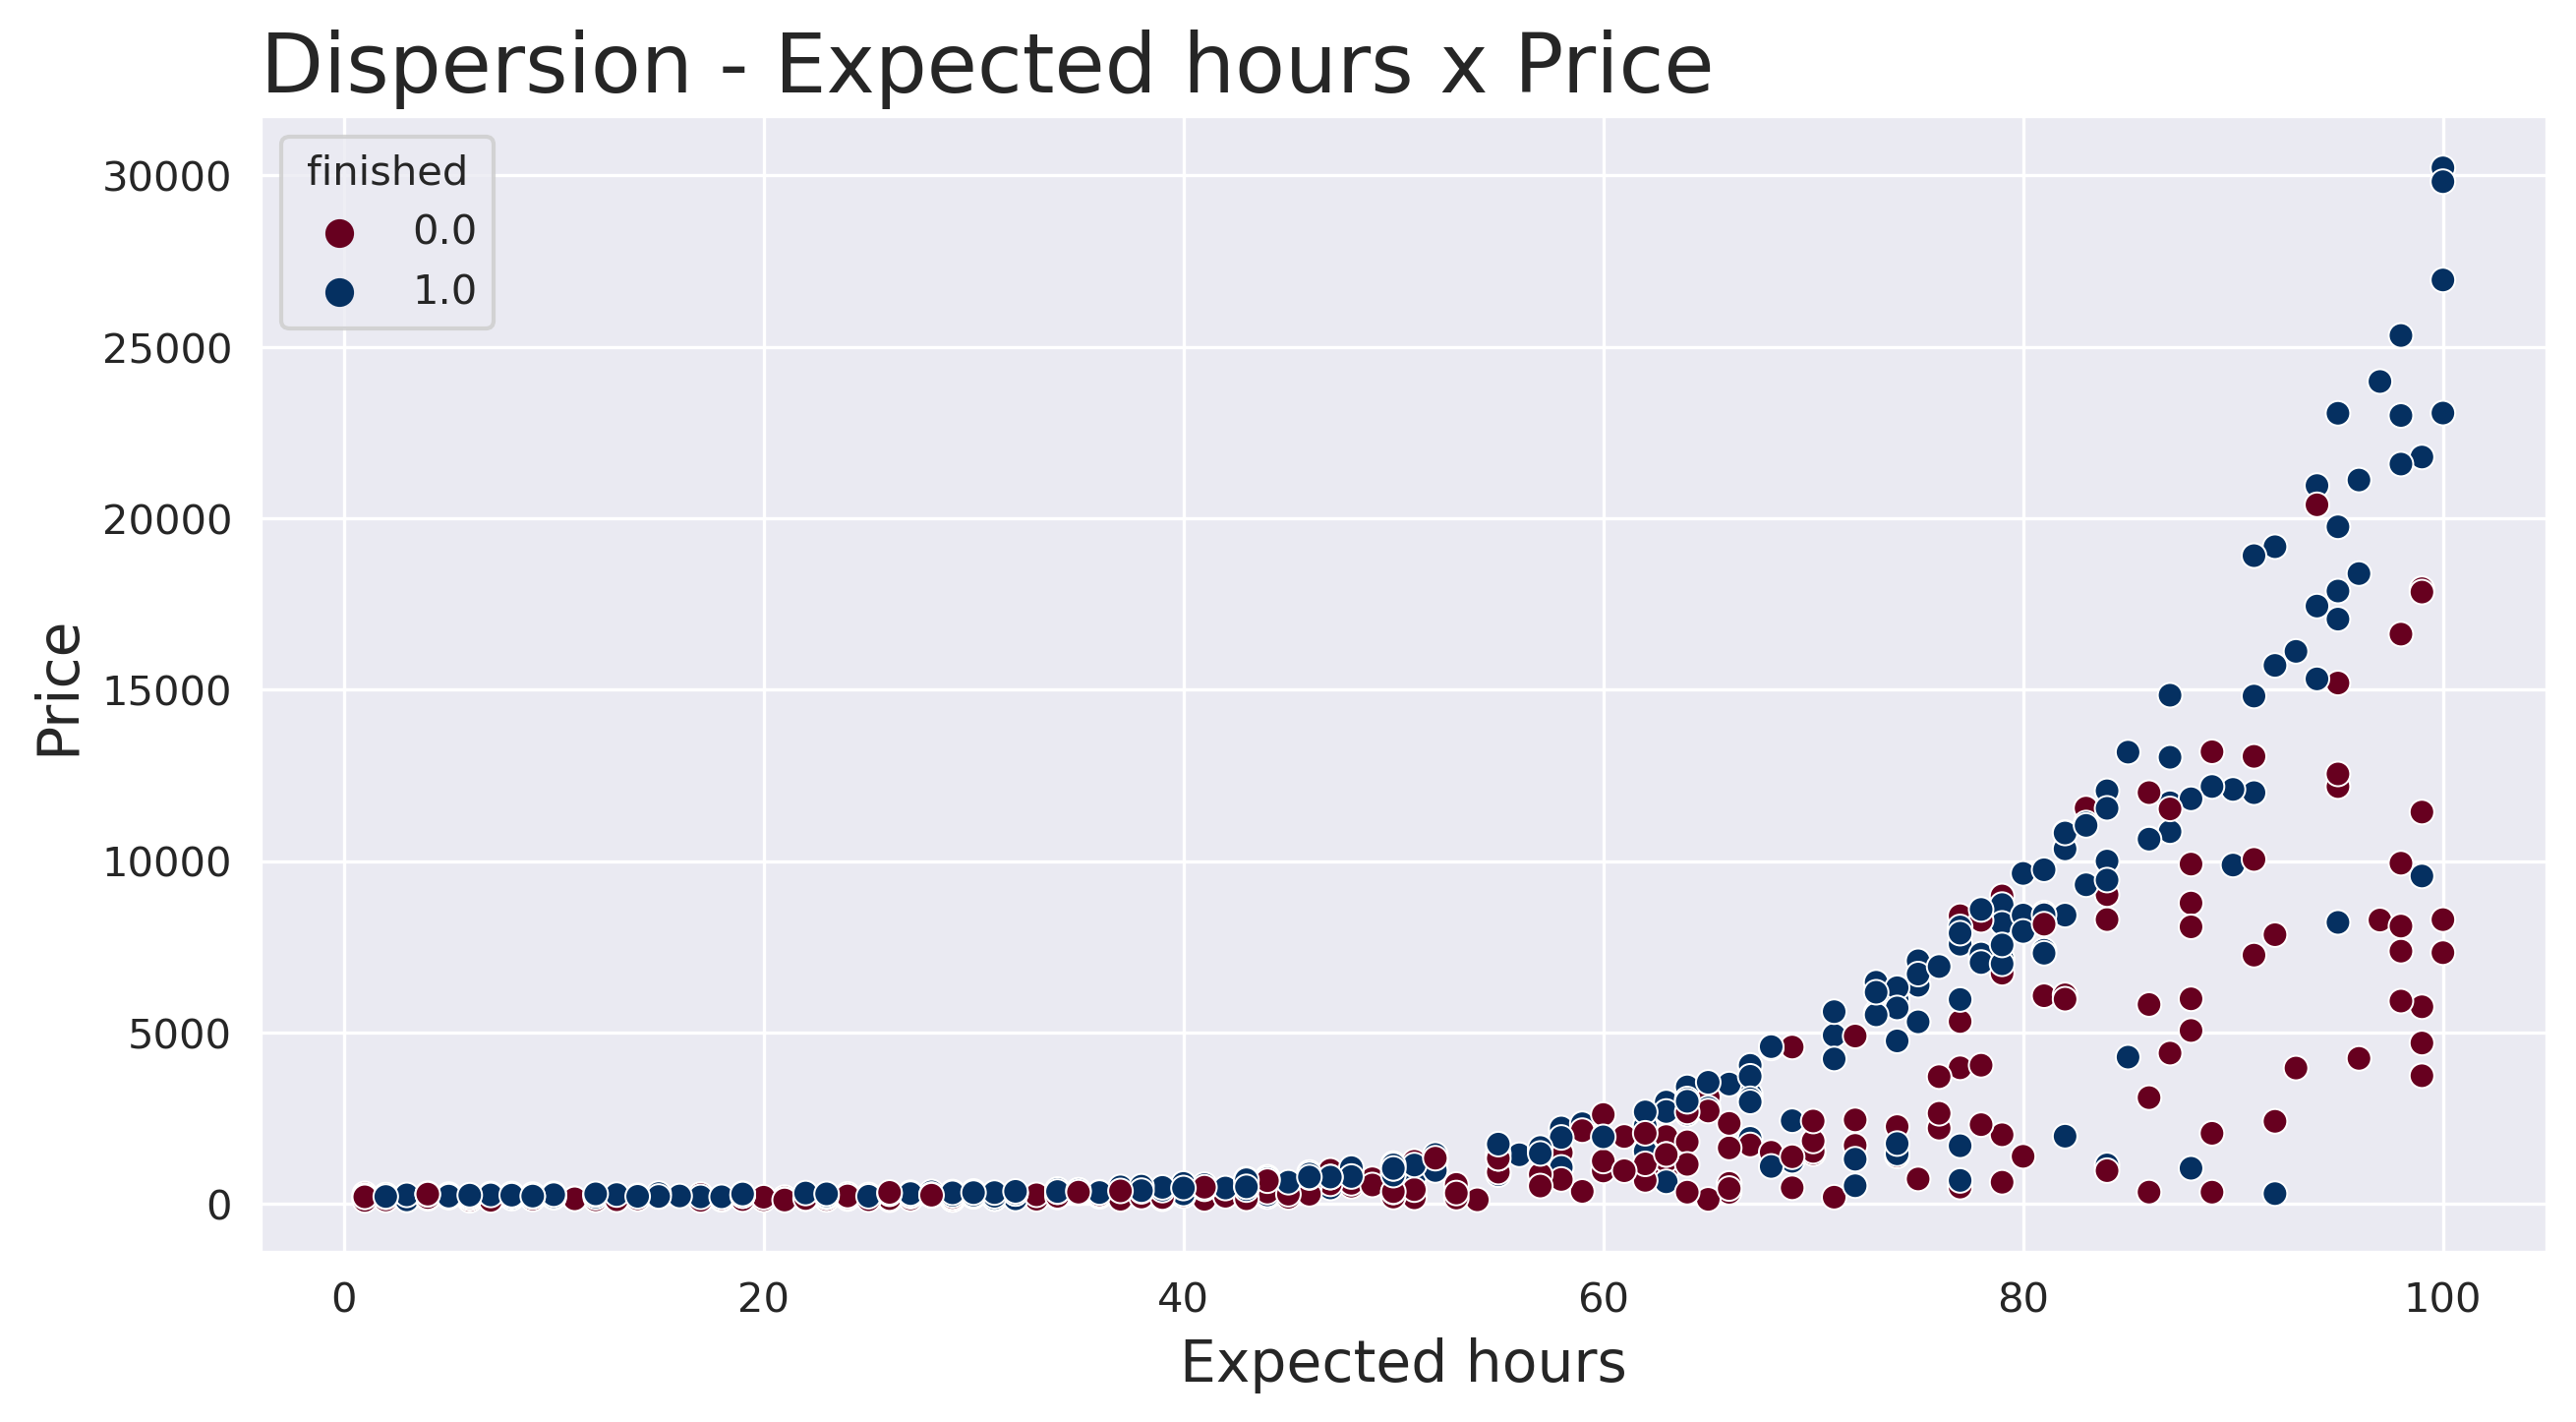

In [115]:
ax = sns.scatterplot(x='expected_hours', y='price', hue=y_test, data=data, palette='RdBu')
ax.figure.set_size_inches(10, 5)
ax.figure.dpi = 300
ax.set_title('Dispersion - Expected hours x Price', fontsize=20, loc='left')
ax.set_xlabel('Expected hours', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
plt.show()

In [116]:
X_min = X_test['expected_hours'].min()
X_max = X_test['expected_hours'].max()
y_min = X_test['price'].min()
y_max = X_test['price'].max()
print(f'X_min: {X_min}')
print(f'X_max: {X_min}')
print(f'y_min: {y_min}')
print(f'y_max: {y_max}')

X_min: 1
X_max: 1
y_min: 100
y_max: 30223


In [117]:
pixels = 100
X_axis = np.arange(X_min, X_max, (X_max - X_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [118]:
XX, yy = np.meshgrid(X_axis, y_axis)
points = np.c_[XX.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [119]:
Z = model.predict(points)
Z = Z.reshape(XX.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

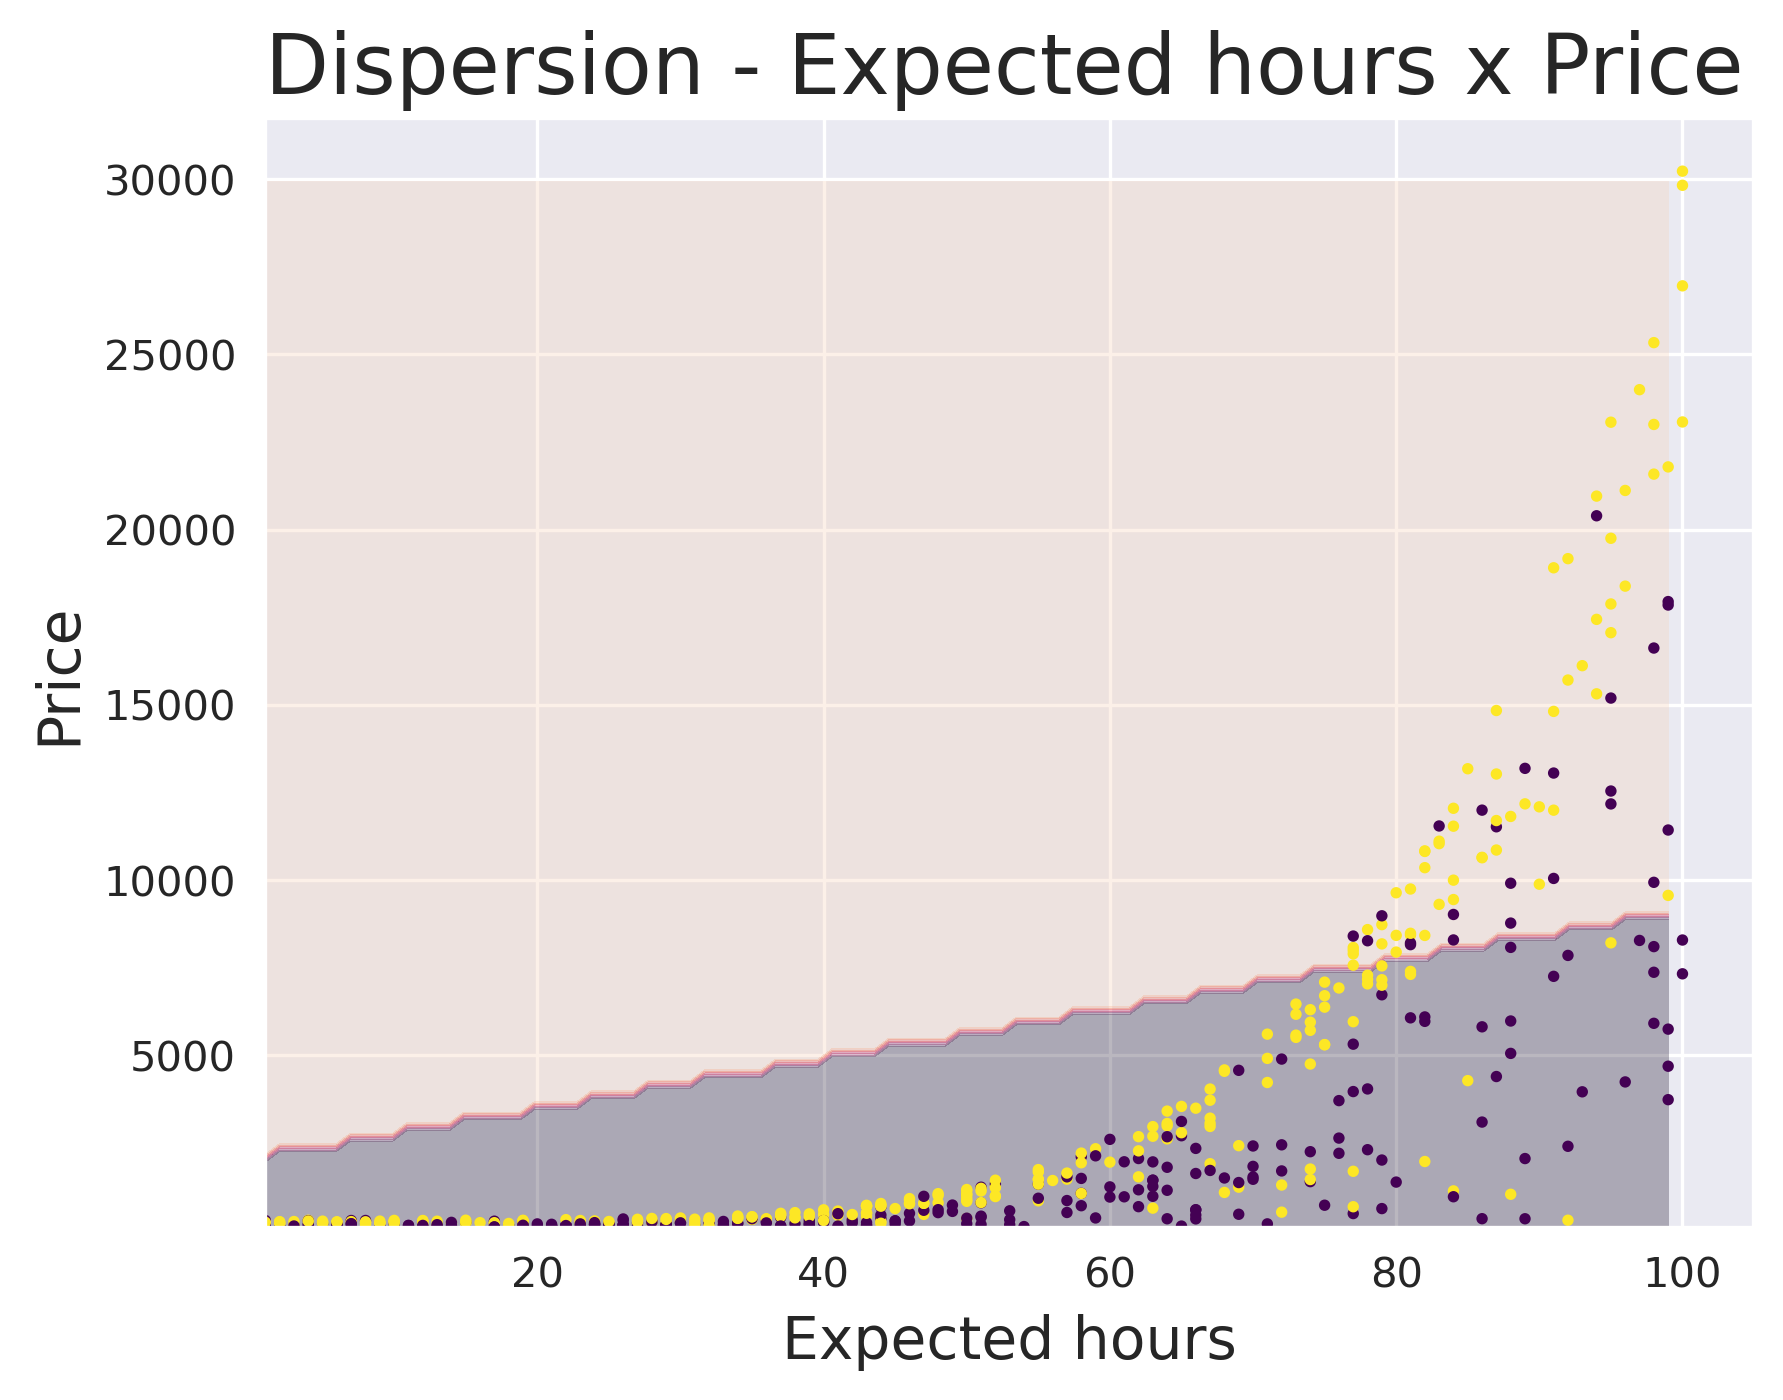

In [120]:
# Decision Boundary
plt.figure(dpi=300)
plt.contourf(XX, yy, Z, alpha=0.3)
plt.scatter(X_test['expected_hours'], X_test['price'], c=y_test, s=3, cmap='viridis')
plt.title('Dispersion - Expected hours x Price', fontsize=20, loc='left')
plt.xlabel('Expected hours', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=.25, 
    random_state=5, 
    stratify=y
)

print(f'We will train the model with {X_train.shape[0]} elements and will test with {X_test.shape[0]} elements')

model = SVC(gamma='auto', random_state=5)
model.fit(X_train, y_train)
y_expected = model.predict(X_test)

accuracy = accuracy_score(y_test, y_expected)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

We will train the model with 1617 elements and will test with 540 elements
Accuracy of the model: 59.07%


In [122]:
X_min = X_test['expected_hours'].min()
X_max = X_test['expected_hours'].max()
y_min = X_test['price'].min()
y_max = X_test['price'].max()
print(f'X_min: {X_min}')
print(f'X_max: {X_min}')
print(f'y_min: {y_min}')
print(f'y_max: {y_max}')

X_min: 1
X_max: 1
y_min: 100
y_max: 30223


In [123]:
pixels = 100
X_axis = np.arange(X_min, X_max, (X_max - X_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [124]:
XX, yy = np.meshgrid(X_axis, y_axis)
points = np.c_[XX.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [125]:
Z = model.predict(points)
Z = Z.reshape(XX.shape)
Z

array([[1, 1, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

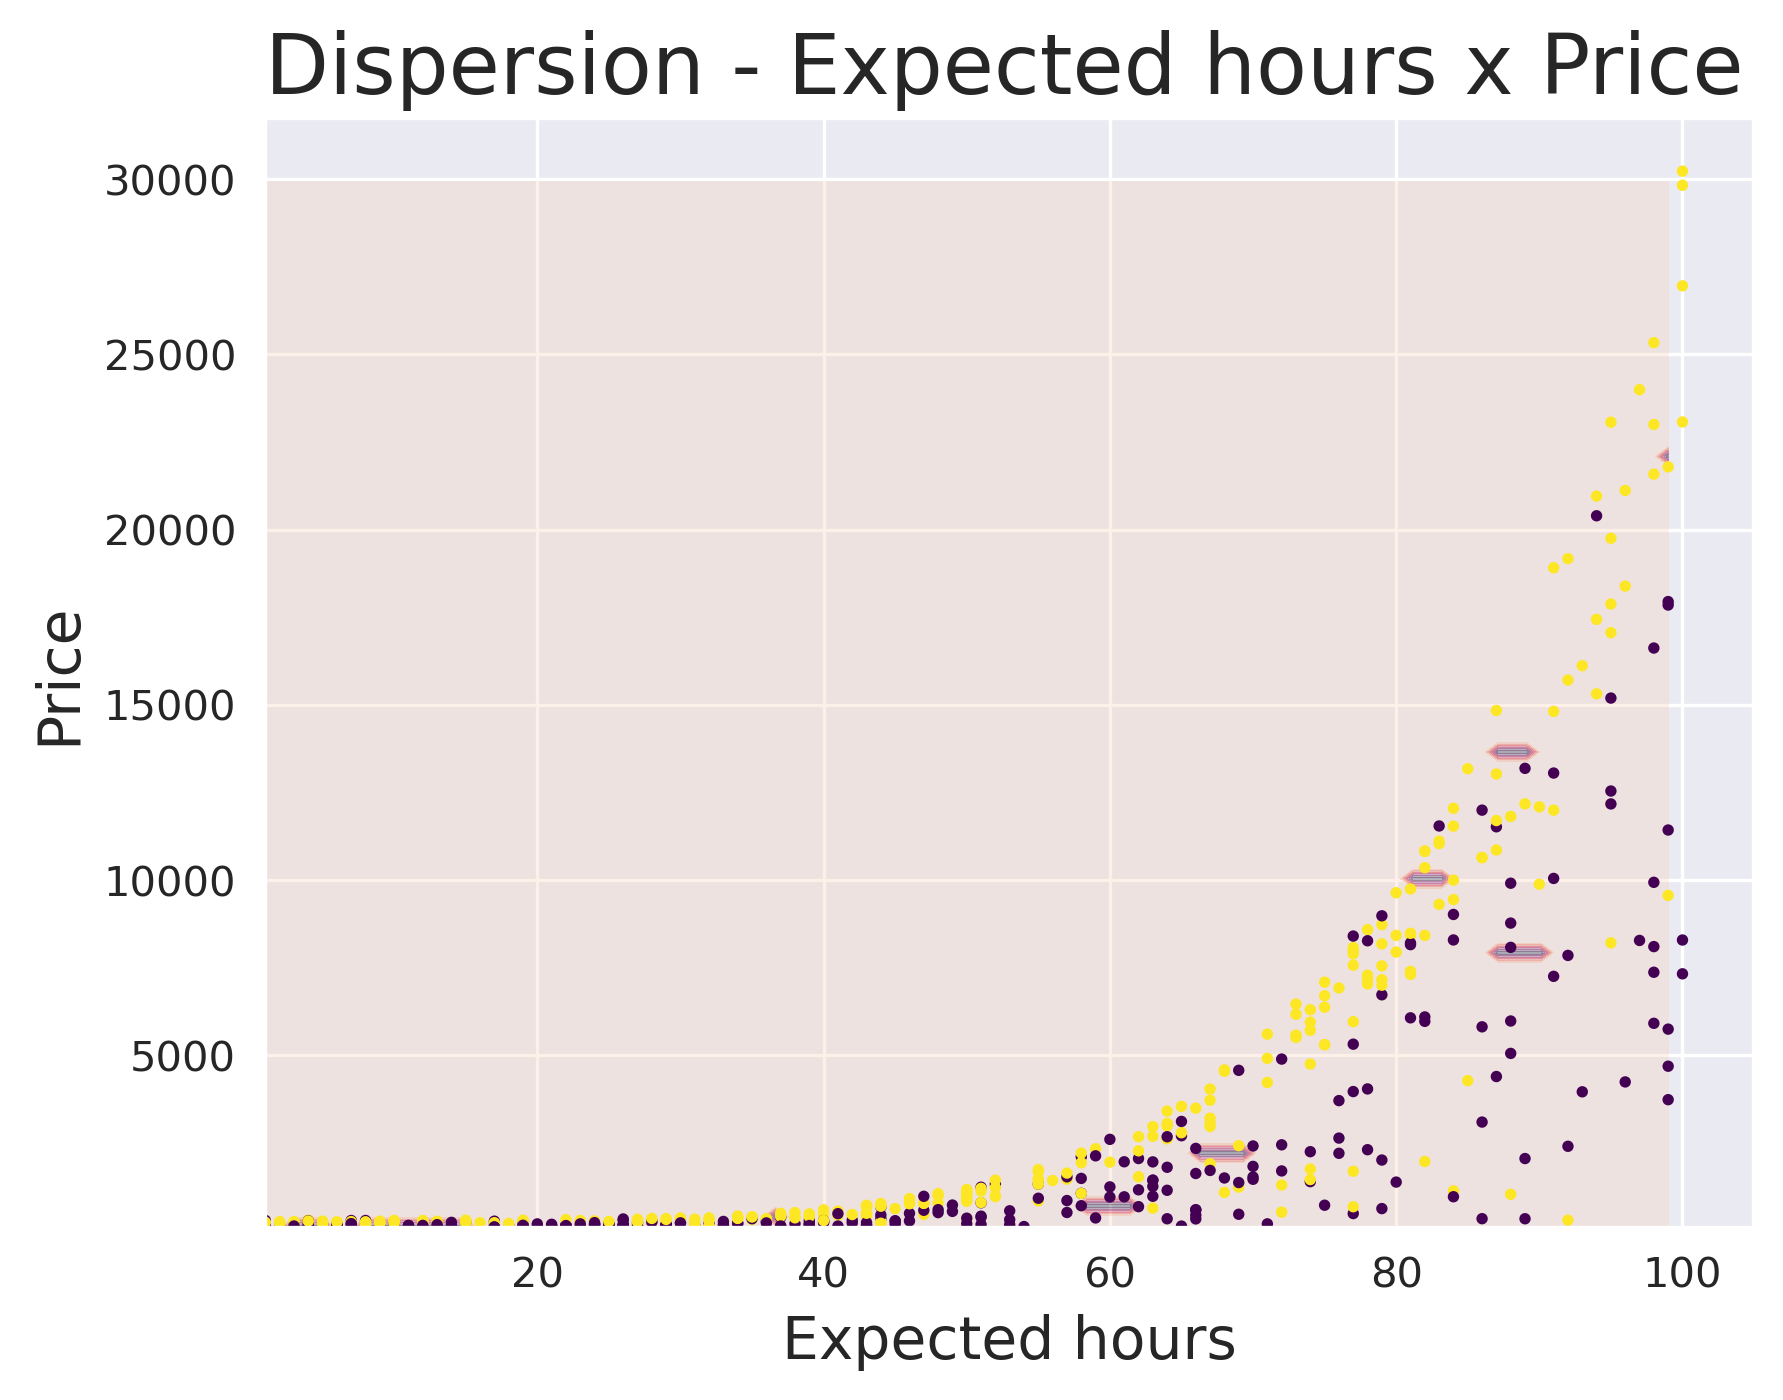

In [126]:
# Decision Boundary
plt.figure(dpi=300)
plt.contourf(XX, yy, Z, alpha=0.3)
plt.scatter(X_test['expected_hours'], X_test['price'], c=y_test, s=3, cmap='viridis')
plt.title('Dispersion - Expected hours x Price', fontsize=20, loc='left')
plt.xlabel('Expected hours', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

In [127]:
raw_X_train, raw_X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=.25, 
    random_state=5, 
    stratify=y
)

print(f'We will train the model with {X_train.shape[0]} elements and will test with {X_test.shape[0]} elements')

scaler = StandardScaler()
scaler.fit(raw_X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)

model = SVC(gamma='auto', random_state=5)
model.fit(X_train, y_train)
y_expected = model.predict(X_test)

accuracy = accuracy_score(y_test, y_expected)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

We will train the model with 1617 elements and will test with 540 elements
Accuracy of the model: 66.85%


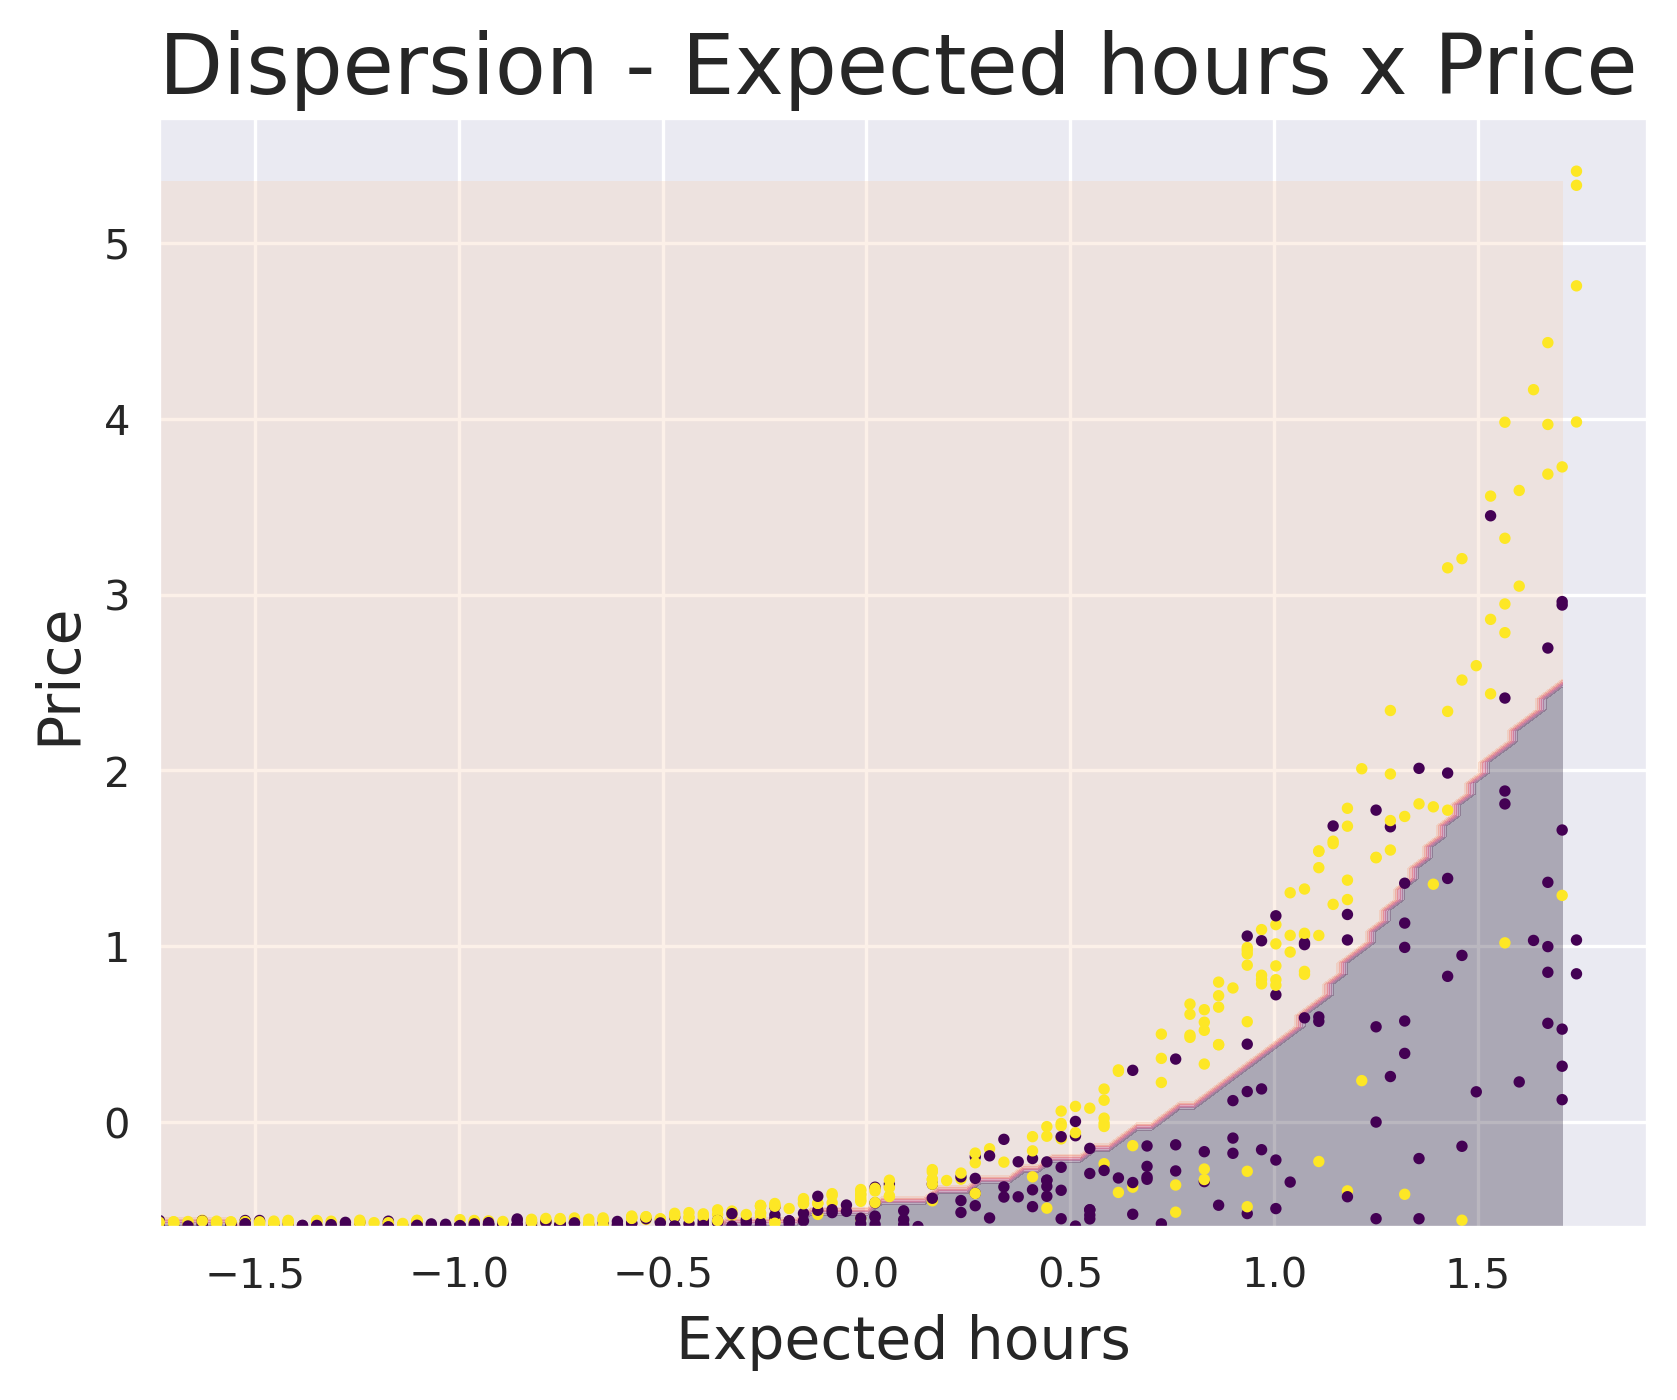

In [128]:
X_data = X_test[:, 0]
y_data = X_test[:, 1]

X_min = X_data.min()
X_max = X_data.max()
y_min = y_data.min()
y_max = y_data.max()

pixels = 100
X_axis = np.arange(X_min, X_max, (X_max - X_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

XX, yy = np.meshgrid(X_axis, y_axis)
points = np.c_[XX.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(XX.shape)

plt.figure(dpi=300)
plt.contourf(XX, yy, Z, alpha=0.3)
plt.scatter(X_data, y_data, c=y_test, s=3, cmap='viridis')
plt.title('Dispersion - Expected hours x Price', fontsize=20, loc='left')
plt.xlabel('Expected hours', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()